Graph 1:
Generated Graph:
[0, 1, 1, 0, 1, 0]
[1, 0, 0, 1, 1, 0]
[1, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 1]
[1, 1, 1, 0, 0, 1]
[0, 0, 0, 1, 1, 0]



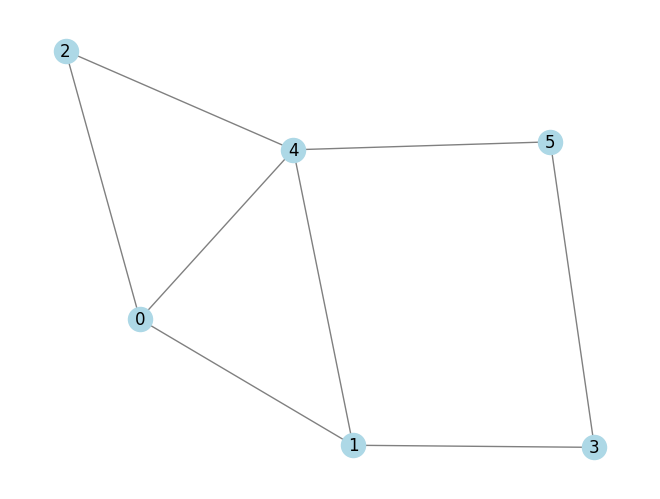

In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx

def generate_random_graph_adj_matrix(num_vertices, edge_density): #generates the adjacent matrix
    graph = [[0] * num_vertices for _ in range(num_vertices)]
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if random.random() < edge_density:
                graph[i][j] = 1
                graph[j][i] = 1
    return graph

def generate_sample_graphs(sample_size, num_vertices, edge_density): #generates the graphs
    """Generate sample graphs for testing the graph coloring algorithm."""
    graphs = []
    for _ in range(sample_size):
        graph = generate_random_graph_adj_matrix(num_vertices, edge_density)
        graphs.append(graph)
    return graphs

def print_graph(graph):#prints the graph
    """Prints a single generated graph."""
    print("Generated Graph:")
    for row in graph:
        print(row)
    print()

def visualize_graph(graph):#visualizes the graphs
    """Visualizes the graph using networkx and matplotlib."""
    G = nx.Graph()
    num_vertices = len(graph)
    G.add_nodes_from(range(num_vertices)) 
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if graph[i][j] == 1:
                G.add_edge(i, j)

    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()

if __name__ == '__main__':
    sample_size = 1
    num_vertices = 6
    edge_density = 0.5
    
    stored_graphs = generate_sample_graphs(sample_size, num_vertices, edge_density)

    for graph_index, graph in enumerate(stored_graphs):
        print(f"Graph {graph_index + 1}:")
        print_graph(graph)
        visualize_graph(graph)



Graph 1:
The assigned colors are as follows:
Vertex:  0  -> Color:  1
Vertex:  1  -> Color:  2
Vertex:  2  -> Color:  2
Vertex:  3  -> Color:  1
Vertex:  4  -> Color:  3
Vertex:  5  -> Color:  2
Coloring is possible for this graph!



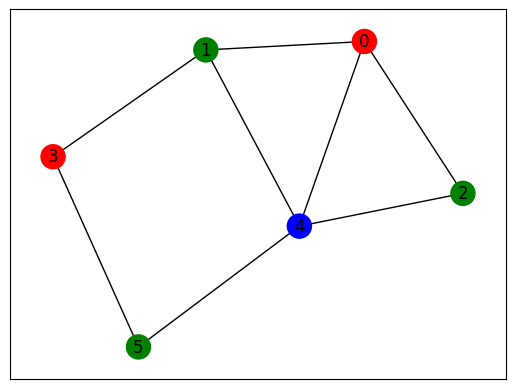

In [2]:
import random
import matplotlib.pyplot as plt
import networkx as nx

def printArray(colorArray): #gives the color ids
    print("The assigned colors are as follows:")
    for i in range(len(colorArray)):
        print("Vertex: ", i, " -> Color: ", colorArray[i])

def checkSafe(graph, colorArray, V): #checks if it is safe to colour
    for i in range(V):
        for j in range(i + 1, V):
            if graph[i][j] and colorArray[j] == colorArray[i]:
                return False
    return True

def graphColoring(graph, m, i, colorArray, V): # main coloring function
    if i == V:
        if checkSafe(graph, colorArray, V):
            printArray(colorArray)
            return True
        return False

    for j in range(1, m + 1):
        colorArray[i] = j
        if graphColoring(graph, m, i + 1, colorArray, V):
            return True
        colorArray[i] = 0  
    return False

def visualize_graph(graph, colorArray): # main visualizing function
    
    G = nx.Graph()
    num_vertices = len(graph)
    G.add_nodes_from(range(num_vertices))
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if graph[i][j] == 1:
                G.add_edge(i, j)

    colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown'] #this is bc colors more than 5 take too much time
    color_map = [colors[colorArray[node]-1] if colorArray[node] > 0 else 'gray' for node in range(num_vertices)]

    pos = nx.spring_layout(G) 
    nx.draw_networkx_nodes(G, pos, node_color=color_map)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.show()

if __name__ == '__main__':
    
    m = 4  # number of colors
    
    for graph_index, graph in enumerate(stored_graphs):
        V = len(graph)
        colorArray = [0] * V 

        print(f"\nGraph {graph_index + 1}:")
        if graphColoring(graph, m, 0, colorArray, V):
            print("Coloring is possible for this graph!\n")
            # Visualize the colored graph
            visualize_graph(graph, colorArray)
        else:
            print("Coloring is not possible for this graph.\n")



Graph 1:
The assigned colors are as follows:
Vertex: 0  -> Color: 2
Vertex: 1  -> Color: 3
Vertex: 2  -> Color: 3
Vertex: 3  -> Color: 1
Vertex: 4  -> Color: 1
Vertex: 5  -> Color: 2
Coloring is possible for this graph!



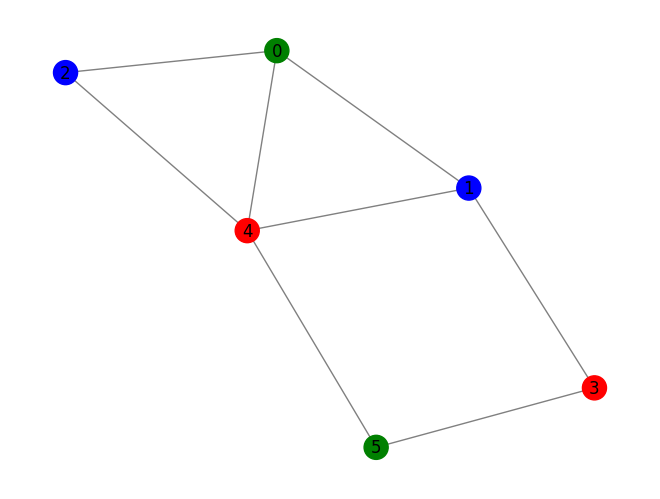

In [3]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import random

class Graph:
    def __init__(self, adjacency_matrix):
        self.adj_matrix = adjacency_matrix
        self.n = len(adjacency_matrix)  

    def DSatur(self): #the main DSatur function
        used = [False] * self.n
        c = [-1] * self.n
        d = [sum(row) for row in self.adj_matrix] 
        adjCols = [set() for _ in range(self.n)]
        Q = []

        for u in range(self.n):
            heapq.heappush(Q, (-0, -d[u], u))  #push the new saturation level to queue

        while Q:
            _, _, u = heapq.heappop(Q)
            minColor = 0
            adjColors = {c[v] for v in range(self.n) if self.adj_matrix[u][v] > 0 and c[v] != -1}
            while minColor in adjColors:
                minColor += 1
            c[u] = minColor
            for v in range(self.n):
                if self.adj_matrix[u][v] > 0 and c[v] == -1:
                    newSat = len({c[w] for w in range(self.n) if self.adj_matrix[v][w] > 0 and c[w] != -1})
                    newDeg = d[v]
                    heapq.heappush(Q, (-newSat, -newDeg, v))
                    
        #the printing statement
        print("The assigned colors are as follows:")
        for i in range(self.n):
            print(f"Vertex: {i}  -> Color: {c[i] + 1}")  
        print("Coloring is possible for this graph!\n")
        

        return c

    def visualize(self, colorArray):
        G = nx.Graph()
        G.add_nodes_from(range(self.n))
        for i in range(self.n):
            for j in range(i + 1, self.n):
                if self.adj_matrix[i][j] > 0:
                    G.add_edge(i, j)

        colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown']
        node_colors = [colors[color] for color in colorArray]

        nx.draw(G, with_labels=True, node_color=node_colors, edge_color='gray')
        plt.show()


if __name__ == '__main__':
   

    for graph_index, graph_matrix in enumerate(stored_graphs):
        print(f"\nGraph {graph_index + 1}:")
        graph = Graph(graph_matrix)
        colorArray = graph.DSatur()
        graph.visualize(colorArray)

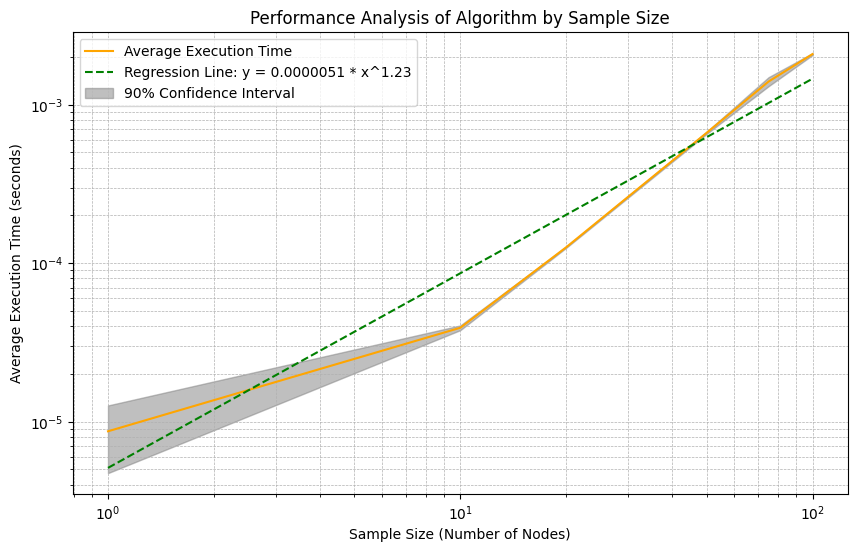

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

class Graph:
    def __init__(self, numVertices, adjMatrix):
        self.numVertices = numVertices
        self.adjMatrix = adjMatrix

    def dsatur(self):
        color = [-1] * self.numVertices
        degrees = [sum(row) for row in self.adjMatrix]
        for i in range(self.numVertices):
            max_deg = max(degrees)
            idx = degrees.index(max_deg)
            chosen_color = 0
            adj_colors = set(color[j] for j in range(self.numVertices) if self.adjMatrix[idx][j] > 0 and color[j] != -1)
            while chosen_color in adj_colors:
                chosen_color += 1
            color[idx] = chosen_color
            degrees[idx] = -1  
        return color

# Parameters
sample_sizes = [1, 10, 20, 50, 75, 100]
edge_density = 0.5
num_samples = 200
num_trials = 10


def generate_random_adj_matrix(num_vertices, edge_density):
    p = edge_density
    adj_matrix = np.random.rand(num_vertices, num_vertices) < p
    np.fill_diagonal(adj_matrix, 0)
    adj_matrix = adj_matrix.astype(int)
    return adj_matrix


def calculate_confidence_interval(data, confidence=0.90):
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1) / np.sqrt(n)
    margin_of_error = stderr * 1.645  
    return mean - margin_of_error, mean + margin_of_error


avg_times = []
conf_intervals = []
for size in sample_sizes:
    times = []
    for _ in range(num_trials):
        adj_matrix = generate_random_adj_matrix(size, edge_density)
        graph = Graph(size, adj_matrix)
        start_time = time.time()
        graph.dsatur()
        end_time = time.time()
        times.append(end_time - start_time)
    avg_times.append(np.mean(times))
    conf_intervals.append(calculate_confidence_interval(times))


conf_lower = [ci[0] for ci in conf_intervals]
conf_upper = [ci[1] for ci in conf_intervals]


log_sample_sizes = np.log(sample_sizes)
log_avg_times = np.log(avg_times)
slope, intercept, _, _, _ = linregress(log_sample_sizes, log_avg_times)
regression_line = np.exp(intercept) * np.array(sample_sizes) ** slope
regression_eq = f"y = {np.exp(intercept):.7f} * x^{slope:.2f}"


plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, avg_times, label='Average Execution Time', color='orange')
plt.plot(sample_sizes, regression_line, '--', label=f'Regression Line: {regression_eq}', color='green')
plt.fill_between(sample_sizes, conf_lower, conf_upper, color='gray', alpha=0.5, label='90% Confidence Interval')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample Size (Number of Nodes)')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Performance Analysis of Algorithm by Sample Size')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('dsatur_performance_analysis_corrected.png')
plt.show()

In [7]:
import heapq
import random

class nodeInfo:
    def __init__(self, sat, deg, vertex):
        self.sat = sat
        self.deg = deg
        self.vertex = vertex

class maxSat:
    def __call__(self, node):
        return (-node.sat, -node.deg, node.vertex)

class Graph:
    def __init__(self, numNodes):
        self.n = numNodes
        self.adj = [[] for _ in range(numNodes)]

    def addEdge(self, u, v):
        self.adj[u].append(v)
        self.adj[v].append(u)

    def DSatur(self):
        used = [False] * self.n
        c = [-1] * self.n
        d = [len(self.adj[u]) for u in range(self.n)]
        adjCols = [set() for _ in range(self.n)]
        Q = []

        for u in range(self.n):
            heapq.heappush(Q, (maxSat()(nodeInfo(0, d[u], u)), u))

        while Q:
            maxPtr, u = heapq.heappop(Q)
            while Q and maxPtr == Q[0][0]:
                _, v = heapq.heappop(Q)
                heapq.heappush(Q, (maxSat()(nodeInfo(len(adjCols[v]), d[v], v)), v))

            for v in self.adj[u]:
                if c[v] != -1:
                    used[c[v]] = True
            for i in range(self.n):
                if not used[i]:
                    break
            for v in self.adj[u]:
                if c[v] != -1:
                    used[c[v]] = False
            c[u] = i
            for v in self.adj[u]:
                if c[v] == -1:
                    heapq.heappush(Q, (maxSat()(nodeInfo(len(adjCols[v]), d[v], v)), v))
                    adjCols[v].add(i)
                    d[v] -= 1

        return max(c) + 1 

def printConfiguration(colorArray):
    print("The assigned colors are as follows:")
    for i in range(len(colorArray)):
        print(f"Vertex: {i} Color: {colorArray[i]}")

def isSafe(graph, colorArray):
    for i in range(len(graph)):
        for j in range(i + 1, len(graph)):
            if graph[i][j] and colorArray[j] == colorArray[i]:
                return False
    return True

def graphColoringAlgorithm(graph, m, i, colorArray):
    if i == len(graph):
        if isSafe(graph, colorArray):
            return True
        return False

    for j in range(1, m + 1):
        colorArray[i] = j
        if graphColoringAlgorithm(graph, m, i + 1, colorArray):
            return True
        colorArray[i] = 0
    return False

def bruteForceChromaticNumber(graph, maxColors):
    for m in range(maxColors, 0, -1):
        colorArray = [0] * len(graph)
        if graphColoringAlgorithm(graph, m, 0, colorArray):
            return m
    return None

def generateRandomGraph(numVertices, edgeProbability=0.5):
    graph = [[0 for _ in range(numVertices)] for _ in range(numVertices)]
    for i in range(numVertices):
        for j in range(i + 1, numVertices):
            if random.random() < edgeProbability:
                graph[i][j] = 1
                graph[j][i] = 1
    return graph

def run_experiment(numVertices, edgeProbability=0.5, iterations=1):
    heuristic_results = []
    brute_force_results = []

    for _ in range(iterations):
        graph = generateRandomGraph(numVertices, edgeProbability)

        g = Graph(numVertices)
        for i in range(numVertices):
            for j in range(i + 1, numVertices):
                if graph[i][j] == 1:
                    g.addEdge(i, j)

        heuristicColors = g.DSatur()
        chromaticNumber = bruteForceChromaticNumber(graph, heuristicColors - 1)
        if chromaticNumber is None:
            chromaticNumber = heuristicColors

        heuristic_results.append(heuristicColors)
        brute_force_results.append(chromaticNumber)

    avg_heuristic = sum(heuristic_results) / iterations
    avg_brute_force = sum(brute_force_results) / iterations

    return avg_heuristic, avg_brute_force


vertex_counts = [5]
results = {}

for numVertices in vertex_counts:
    avg_heuristic, avg_brute_force = run_experiment(numVertices, iterations=1)
    results[numVertices] = (avg_heuristic, avg_brute_force)

results


{5: (3.0, 3.0)}

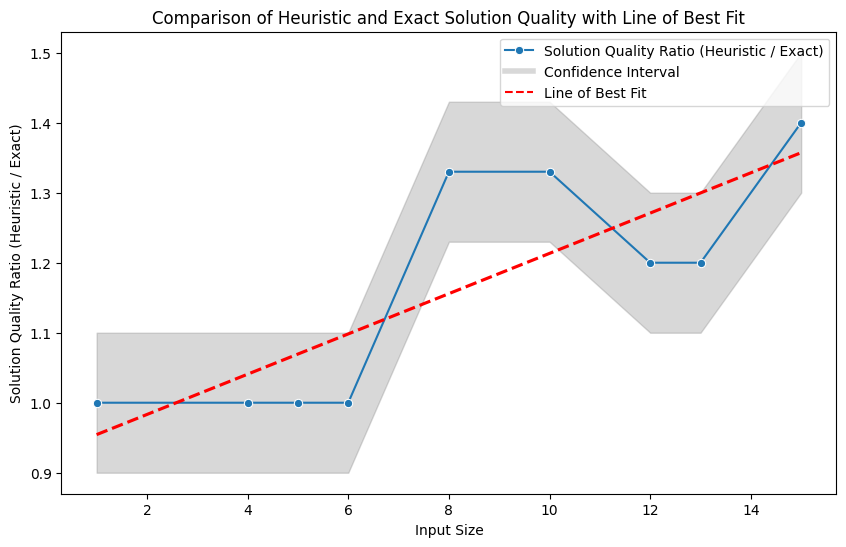

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from your table
data = {
    "Input Size": [1, 4, 5, 6, 8, 10, 12, 13, 15],
    "Ratio of Heuristic/Exact": [1, 1, 1, 1, 1.33, 1.33, 1.2, 1.2, 1.4]
}


df = pd.DataFrame(data)


plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(x="Input Size", y="Ratio of Heuristic/Exact", data=df, marker='o', label="Solution Quality Ratio (Heuristic / Exact)")


ci = 0.1
plt.fill_between(df["Input Size"], df["Ratio of Heuristic/Exact"] - ci, df["Ratio of Heuristic/Exact"] + ci, color='gray', alpha=0.3)


sns.regplot(x="Input Size", y="Ratio of Heuristic/Exact", data=df, scatter=False, color='red', line_kws={"label": "Line of Best Fit", 'linestyle':'--'}, ci=None)


plt.xlabel("Input Size")
plt.ylabel("Solution Quality Ratio (Heuristic / Exact)")
plt.title("Comparison of Heuristic and Exact Solution Quality with Line of Best Fit")


handles, labels = line_plot.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='gray', lw=4, alpha=0.3))
labels.append('Confidence Interval')
handles.append(plt.Line2D([0], [0], color='red', linestyle='--'))
labels.append('Line of Best Fit')
plt.legend(handles=handles, labels=labels)

plt.show()

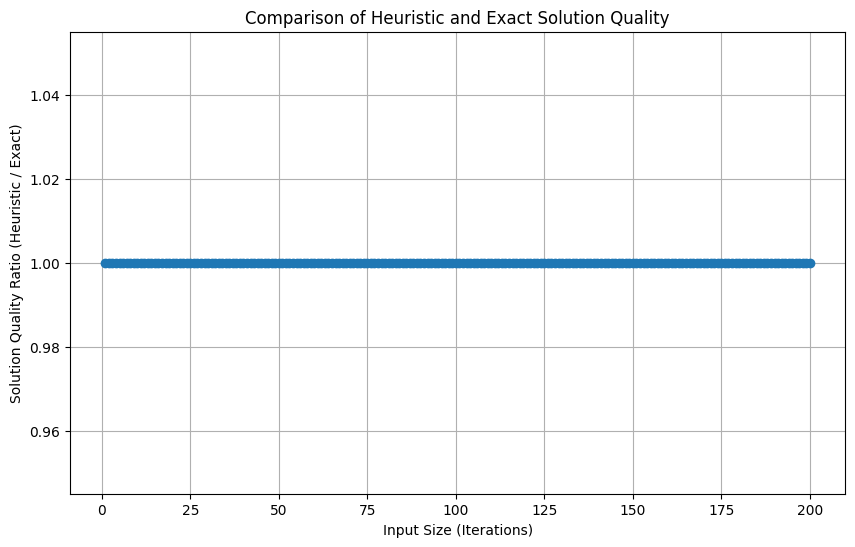

In [10]:
import heapq
import random
import matplotlib.pyplot as plt

class nodeInfo:
    def __init__(self, sat, deg, vertex):
        self.sat = sat
        self.deg = deg
        self.vertex = vertex

class maxSat:
    def __call__(self, node):
        return (-node.sat, -node.deg, node.vertex)

class Graph:
    def __init__(self, numNodes):
        self.n = numNodes
        self.adj = [[] for _ in range(numNodes)]

    def addEdge(self, u, v):
        self.adj[u].append(v)
        self.adj[v].append(u)

    def DSatur(self):
        used = [False] * self.n
        c = [-1] * self.n
        d = [len(self.adj[u]) for u in range(self.n)]
        adjCols = [set() for _ in range(self.n)]
        Q = []

        for u in range(self.n):
            heapq.heappush(Q, (maxSat()(nodeInfo(0, d[u], u)), u))

        while Q:
            maxPtr, u = heapq.heappop(Q)
            while Q and maxPtr == Q[0][0]:
                _, v = heapq.heappop(Q)
                heapq.heappush(Q, (maxSat()(nodeInfo(len(adjCols[v]), d[v], v)), v))

            for v in self.adj[u]:
                if c[v] != -1:
                    used[c[v]] = True
            for i in range(self.n):
                if not used[i]:
                    break
            for v in self.adj[u]:
                if c[v] != -1:
                    used[c[v]] = False
            c[u] = i
            for v in self.adj[u]:
                if c[v] == -1:
                    heapq.heappush(Q, (maxSat()(nodeInfo(len(adjCols[v]), d[v], v)), v))
                    adjCols[v].add(i)
                    d[v] -= 1

        return max(c) + 1 

def isSafe(graph, colorArray):
    for i in range(len(graph)):
        for j in range(i + 1, len(graph)):
            if graph[i][j] and colorArray[j] == colorArray[i]:
                return False
    return True

def graphColoringAlgorithm(graph, m, i, colorArray):
    if i == len(graph):
        if isSafe(graph, colorArray):
            return True
        return False

    for j in range(1, m + 1):
        colorArray[i] = j
        if graphColoringAlgorithm(graph, m, i + 1, colorArray):
            return True
        colorArray[i] = 0
    return False

def bruteForceChromaticNumber(graph, maxColors):
    for m in range(maxColors, 0, -1):
        colorArray = [0] * len(graph)
        if graphColoringAlgorithm(graph, m, 0, colorArray):
            return m
    return None

def generateRandomGraph(numVertices, edgeProbability=0.5):
    graph = [[0 for _ in range(numVertices)] for _ in range(numVertices)]
    for i in range(numVertices):
        for j in range(i + 1, numVertices):
            if random.random() < edgeProbability:
                graph[i][j] = 1
                graph[j][i] = 1
    return graph

def run_experiment(numVertices, edgeProbability=0.5, iterations=1):
    heuristic_results = []
    brute_force_results = []

    for _ in range(iterations):
        graph = generateRandomGraph(numVertices, edgeProbability)

        g = Graph(numVertices)
        for i in range(numVertices):
            for j in range(i + 1, numVertices):
                if graph[i][j] == 1:
                    g.addEdge(i, j)

        heuristicColors = g.DSatur()
        chromaticNumber = bruteForceChromaticNumber(graph, heuristicColors - 1)
        if chromaticNumber is None:
            chromaticNumber = heuristicColors

        heuristic_results.append(heuristicColors)
        brute_force_results.append(chromaticNumber)

    avg_heuristic = sum(heuristic_results) / iterations
    avg_brute_force = sum(brute_force_results) / iterations

    return avg_heuristic, avg_brute_force


numVertices = 1


iteration_counts = range(1, 201)
results = {}

for iterations in iteration_counts:
    avg_heuristic, avg_brute_force = run_experiment(numVertices, iterations=iterations)
    results[iterations] = (avg_heuristic, avg_brute_force)


input_sizes = list(results.keys())
ratios = [results[size][0] / results[size][1] for size in input_sizes]

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, ratios, marker='o', linestyle='-', )
plt.xlabel('Input Size (Iterations)')
plt.ylabel('Solution Quality Ratio (Heuristic / Exact)')
plt.title('Comparison of Heuristic and Exact Solution Quality')
plt.grid(True)
plt.show()

In [11]:
import numpy as np

class Graph:
    def __init__(self, numVertices, adjMatrix):
        self.numVertices = numVertices
        self.adjMatrix = adjMatrix

    def dsatur(self):
        if self.numVertices == 0:  
            return []

        color = [-1] * self.numVertices
        degrees = [sum(row) for row in self.adjMatrix]
        saturation = [0] * self.numVertices  
        uncolored = set(range(self.numVertices))

        while uncolored:
            max_sat = max(saturation[v] for v in uncolored)
            candidates = [v for v in uncolored if saturation[v] == max_sat]
            idx = max(candidates, key=lambda v: degrees[v])

            adj_colors = set(color[j] for j in range(self.numVertices) if self.adjMatrix[idx][j] > 0 and color[j] != -1)
            chosen_color = 0
            while chosen_color in adj_colors:
                chosen_color += 1
            color[idx] = chosen_color
            uncolored.remove(idx)

            for j in range(self.numVertices):
                if self.adjMatrix[idx][j] > 0 and color[j] == -1:
                    saturation[j] += 1
        return color

def test_dsatur():
    test_cases = [
        # Test case 1: Empty graph
        {"graph": np.array([[]]), "expected": []},
        
        # Test case 2: Graph with no edges
        {"graph": np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]), "expected": [0, 0, 0]},
        
        # Test case 3: Graph with multiple vertices and edges
        {"graph": np.array([[0, 1, 1], [1, 0, 0], [1, 0, 0]]), "expected": [0, 1, 1]},
        
        # Test case 4: Graph with isolated vertices
        {"graph": np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]), "expected": [0, 0, 0, 0]},
        
        # Test case 5: Graph with self-loop
        {"graph": np.array([[1]]), "expected": [0]},
        
        # Test case 6: Graph with multiple connected components
        {"graph": np.array([[0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0]]), "expected": [0, 1, 1, 0, 0, 1]}
    ]

    for i, test_case in enumerate(test_cases):
        if test_case["graph"].size == 0:
            num_vertices = 0
        else:
            num_vertices = test_case["graph"].shape[0]
        graph = Graph(num_vertices, test_case["graph"])
        output = graph.dsatur()
        assert output == test_case["expected"], f"Test case {i+1} failed: expected {test_case['expected']}, got {output}"
        print(f"Test case {i+1} passed.")

test_dsatur()


Test case 1 passed.
Test case 2 passed.
Test case 3 passed.
Test case 4 passed.
Test case 5 passed.
Test case 6 passed.


In [12]:
import numpy as np

class Graph:
    def __init__(self, numVertices, adjMatrix):
        self.numVertices = numVertices
        self.adjMatrix = adjMatrix

    def dsatur(self):
        if self.numVertices == 0:
            return []

        color = [-1] * self.numVertices
        degrees = [sum(row) for row in self.adjMatrix]
        saturation = [0] * self.numVertices  
        uncolored = set(range(self.numVertices))

        while uncolored:
            max_sat = max(saturation[v] for v in uncolored)
            candidates = [v for v in uncolored if saturation[v] == max_sat]
            idx = max(candidates, key=lambda v: degrees[v])

            adj_colors = set(color[j] for j in range(self.numVertices) if self.adjMatrix[idx][j] > 0 and color[j] != -1)
            chosen_color = 0
            while chosen_color in adj_colors:
                chosen_color += 1
            color[idx] = chosen_color
            uncolored.remove(idx)

            for j in range(self.numVertices):
                if self.adjMatrix[idx][j] > 0 and color[j] == -1:
                    saturation[j] += 1
        return color

def test_dsatur_statement_coverage():
    # Test case 1: Empty graph
    graph = Graph(0, np.array([[]]))
    assert graph.dsatur() == [], "Failed: Empty graph"

    # Test case 2: Graph with no edges
    graph = Graph(3, np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]))
    assert graph.dsatur() == [0, 0, 0], "Failed: Graph with no edges"

    # Test case 3: Complete graph
    graph = Graph(3, np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]]))
    assert graph.dsatur() == [0, 1, 2], "Failed: Complete graph"

    # Test case 5: Graph with self-loop
    graph = Graph(1, np.array([[1]]))
    assert graph.dsatur() == [0], "Failed: Graph with self-loop"

    # Test case 6: Graph with multiple connected components
    graph = Graph(6, np.array([[0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0]]))
    assert graph.dsatur() == [0, 1, 1, 0, 0, 1], "Failed: Graph with multiple connected components"

def test_dsatur_decision_coverage():
    
    graph = Graph(0, np.array([[]]))
    assert graph.dsatur() == [], "Failed: Empty graph"

    
    graph = Graph(3, np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]))
    output = graph.dsatur()
    
    assert output == [1, 0, 1], f"Failed: Path with vertices having edges, got {output}"

    graph = Graph(3, np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]))
    output = graph.dsatur()

    assert output == [0, 0, 0], f"Failed: Path with vertices having no edges, got {output}"

def test_dsatur_path_coverage():
    # Path 1: Two minimum degree vertices
    graph = Graph(3, np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]))
    output = graph.dsatur()
   
    assert output == [1, 0, 1], f"Failed: Two minimum degree vertices, got {output}"

    # Path 2: Vertices with no edges
    graph = Graph(3, np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]))
    output = graph.dsatur()
    assert output == [0, 0, 0], f"Failed: Vertices with no edges, got {output}"

    # Path 3: No start vertex (empty graph)
    graph = Graph(0, np.array([[]]))
    output = graph.dsatur()
    assert output == [], f"Failed: No start vertex (empty graph), got {output}"

    # Path 4: Loop execution (while loop condition is True)
    graph = Graph(4, np.array([[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]))
    output = graph.dsatur()
    assert output == [0, 1, 0, 1], f"Failed: Loop execution (while loop condition is True), got {output}"

    # Path 5: Loop execution (while loop condition is False)
    graph = Graph(1, np.array([[0]]))
    output = graph.dsatur()
    assert output == [0], f"Failed: Loop execution (while loop condition is False), got {output}"


test_dsatur_statement_coverage()
test_dsatur_decision_coverage()
test_dsatur_path_coverage()

print("All white box tests passed successfully.")


All white box tests passed successfully.
